In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
url = "https://github.com/swarj/MLProject/raw/main/apple_share_price.csv" #get the dataset
raw_df = pd.read_csv(url)
raw_df = raw_df.loc[::-1] #reverse order of rows to chronologically make it go from past --> present
raw_df = raw_df.assign(Time=range(len(raw_df)))
df = raw_df.reindex(['Time','Date', 'High', 'Low', 'Volume', 'Open', 'Close'], axis = 1) #make target variable last column, if we want close instead of open we can switch it
#we can try to predict the close value for the following day, need to add target close value  
df['TargetNextClose'] = df['Close'].shift(-1)
df.drop(df.tail(1).index,inplace=True) # drop last rows
df.style
print(df.head(10))
print(df.shape)
df.reset_index(inplace=True)
data_set = df.iloc[:, 0:8]
pd.set_option('display.max_columns', None)
data_set = data_set.drop(columns=["Date", "Time", "index"], axis=1)
print(data_set.head(10))

      Time       Date   High    Low     Volume   Open  Close  TargetNextClose
1663     0   3-Jan-11  47.18  46.41  111280407  46.52  47.08            47.33
1662     1   4-Jan-11  47.50  46.88   77337001  47.49  47.33            47.71
1661     2   5-Jan-11  47.76  47.07   63879193  47.08  47.71            47.68
1660     3   6-Jan-11  47.89  47.56   75106626  47.82  47.68            48.02
1659     4   7-Jan-11  48.05  47.41   77982212  47.71  48.02            48.92
1658     5  10-Jan-11  49.03  48.17  112139482  48.40  48.92            48.81
1657     6  11-Jan-11  49.28  48.50  111019993  49.27  48.81            49.20
1656     7  12-Jan-11  49.20  48.86   75644310  49.04  49.20            49.38
1655     8  13-Jan-11  49.52  49.12   74536182  49.31  49.38            49.78
1654     9  14-Jan-11  49.78  49.21   77209748  49.41  49.78            48.66
(1663, 8)
    High    Low     Volume   Open  Close
0  47.18  46.41  111280407  46.52  47.08
1  47.50  46.88   77337001  47.49  47.33
2  47.76 

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

Loss: [[207.90704672]]
Loss: [[170.02763226]]
Loss: [[128.25493963]]
Loss: [[81.46596946]]
Loss: [[38.65296993]]
Loss: [[21.49790207]]
Loss: [[14.35808092]]
Loss: [[11.27163775]]
Loss: [[10.34045738]]
Loss: [[11.60192821]]


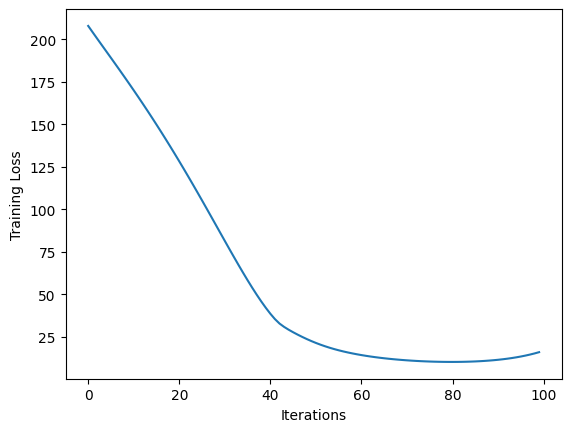

Mean Squared Error: 0.06925742331729878
Predictions: [array([[0.45265545]]), array([[0.44505608]]), array([[0.44050309]]), array([[0.43592308]]), array([[0.42835969]]), array([[0.42455826]]), array([[0.41763449]]), array([[0.36585533]]), array([[0.34784965]]), array([[0.32856936]]), array([[0.32289489]]), array([[0.32422681]]), array([[0.32934831]]), array([[0.32580311]]), array([[0.31987245]]), array([[0.32012842]]), array([[0.31961728]]), array([[0.3210635]]), array([[0.30650276]]), array([[0.2998441]]), array([[0.30538414]]), array([[0.31600377]]), array([[0.32301309]]), array([[0.32750401]]), array([[0.33202864]]), array([[0.33957978]]), array([[0.34862898]]), array([[0.35900568]]), array([[0.36442821]]), array([[0.37000436]]), array([[0.37107841]]), array([[0.37060196]]), array([[0.36098793]]), array([[0.36115669]]), array([[0.36844814]]), array([[0.3726385]]), array([[0.3734781]]), array([[0.37242458]]), array([[0.37009975]]), array([[0.36572555]]), array([[0.36099875]]), array([

In [16]:
# Define the hyperparameters
hidden_layer_size = 64 # set hidden layer size
time_steps = 30 # number of time steps
input_dimension = 4 # set number od dimension 
learning_rate = 0.0001 # set learning rate
# Define size of training set and size of testing set (80% training, 20% testing)
splitlimit = int(len(data_set)*0.8)
# initialize weight matrices and biases with random numbers
input_hidden = np.random.randn(hidden_layer_size, input_dimension) * 0.01 # input to hidden weight
hidden_hidden = np.random.randn(hidden_layer_size, hidden_layer_size) * 0.02 # recurrent weight
hidden_output = np.random.randn(1, hidden_layer_size) * 0.05 # hidden to output determine by how much of hidden layer size
hidden_bias = np.zeros((hidden_layer_size, 1)) # hidden layer bias
output_bias = np.zeros((1, 1)) # output layer bias
# defind the forward pass function
def forward_pass(X, Y, hidden_state): 
    # X is an input sequence, 
    # Y is an output of that input sequence
    # hidden_state is a hidden state of weights

    # to store the store variables   
    store = {}  
    # initialize the hidden state and the loss  
    # store the hidden state 
    store['hidden'] = {}
    # store the input 
    store['input'] = {}
    # create a temporary hidden state form the preveious hidden state
    store['hidden'][-1] = np.copy(hidden_state)
    # set the loss to 0
    loss = 0
    # loop for forward pass
    for t in range(len(X)):
        # store the input in time step
        store['input'][t] = X[t].reshape(-1, 1)
        # store the hidden state in time step
        store['hidden'][t] = np.tanh(np.dot(input_hidden, store['input'][t]) + np.dot(hidden_hidden, store['hidden'][t-1]) + hidden_bias)
        # calculate the predicted ouput
        Y_pred = np.dot(hidden_output, store['hidden'][t]) + output_bias
        # calculate the update loss
        loss += (Y[t] - Y_pred)**2
    # this is store the predicted ouput    
    store['loss'] = loss    
    # this is store the loss  
    store['Y_pred'] = Y_pred    
    return store
# defind the backward pass function
def backward_propagation(X, Y, store):
    # X is the input sequence
    # Y is an output of that input sequence
    # initialize the gradients
    input_hidden_grad = np.zeros_like(input_hidden) # input to hidden gradient
    hidden_hidden_grad = np.zeros_like(hidden_hidden) # hidden to hidden gradient
    hidden_output_grad = np.zeros_like(hidden_output) # hidden to output gradient
    hidden_bias_grad = np.zeros_like(hidden_bias) # hidden layer bias gradient
    output_bias_grad = np.zeros_like(output_bias) # output layer bias gradient
    next_hidden_grad = np.zeros_like(store['hidden'][0]) # next hidden state gradient
    # loop for backward pass
    for t in reversed(range(len(X))):
        # calcualte the derivative of the loss
        dy = -2 * (Y[t] - store['Y_pred'])
        hidden_output_grad += np.dot(dy, store['hidden'][t].T)
        output_bias_grad += dy
        # calculate the derivative of the hidden state
        delta_hidden = np.dot(hidden_output.T, dy) + next_hidden_grad
        raw_hidden = (1 - store['hidden'][t]**2) * delta_hidden
        # Update the gradients for the hidden layer
        hidden_bias_grad += raw_hidden
        input_hidden_grad += np.dot(raw_hidden, store['input'][t].T)
        hidden_hidden_grad += np.dot(raw_hidden, store['hidden'][t-1].T)
        next_hidden_grad = np.dot(hidden_hidden.T, raw_hidden)
    # clip the gradients to prevent it from becoming too large during training
    for dparam in [input_hidden_grad, hidden_hidden_grad, hidden_output_grad, hidden_bias_grad, output_bias_grad]:
        np.clip(dparam, -5, 5, out=dparam)        
    return input_hidden_grad, hidden_hidden_grad, hidden_output_grad, hidden_bias_grad, output_bias_grad
# set the initial hidden state to None
hidden_state = np.zeros((hidden_layer_size, 1))
data = data_set
data = sc.fit_transform(data)
data = pd.DataFrame(data)
#split the dataset into testing and training
X, X_test = np.array(data.iloc[:, :-1])[:splitlimit], np.array(data.iloc[:, :-1])[splitlimit:]
Y, Y_test = np.array(data.iloc[:, -1]).reshape(-1, 1)[:splitlimit], np.array(data.iloc[:, -1]).reshape(-1, 1)[splitlimit:]
# create an empty list for loss
loss_his = []
#training 
for i in range(100):    
    store = forward_pass(X, Y, hidden_state)
    input_hidden_grad, hidden_hidden_grad, hidden_output_grad, hidden_bias_grad, output_bias_grad = backward_propagation(X, Y, store)
    input_hidden -= learning_rate * input_hidden_grad
    hidden_hidden -= learning_rate * hidden_hidden_grad
    hidden_output -= learning_rate * hidden_output_grad
    hidden_bias -= learning_rate * hidden_bias_grad
    output_bias -= learning_rate * output_bias_grad
    hidden_state = store['hidden'][len(X) - 1]
    # adding the value of the loss
    loss_his.append(store['loss'])

    if i % 10 == 0:
        print('Loss:', store['loss'])
        # flatten the loss history array
# flatten the loss array
losses = np.array(loss_his).flatten()
 # plot 
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.show()     
# predict the test set
Y_preds = []
for t in range(len(X_test)):
    store = forward_pass([X_test[t]], [Y_test[t]], hidden_state)
    Y_preds.append(store['Y_pred'])
    hidden_state = store['hidden'][0]
# calculate the MSE
MSE = np.mean((Y_test - Y_preds)**2)
print('Mean Squared Error:', MSE)
print('Predictions:', Y_preds)